In [15]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
#Transformer model
from transformers import pipeline

In [23]:
import torch

import tensorflow as tf

In [51]:
posts_df=pd.read_csv('ML_AI_DS.csv')
comments_df=pd.read_csv('ML_AI_DS_comments.csv')  

In [55]:
posts_df = posts_df.rename(columns={'created_utc': 'created_date'})

In [59]:
import datetime as dt

In [61]:
# Convert created data to datetime format
posts_df['created_date']=posts_df['created_date'].apply(lambda x: dt.datetime.fromtimestamp(x))
posts_df['created_year']=posts_df['created_date'].dt.year
posts_df

,post_id,subreddit,created_date,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_year
0,gh1dj9,MachineLearning,2020-05-10 18:49:54,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,8327,195,0.99,2020
1,kuc6tz,MachineLearning,2021-01-10 16:00:36,NaN,https://v.redd.it/25nxi9ojfha61,[D] A Demo from 1993 of 32-year-old Yann LeCun...,Discussion,6228,134,0.98,2021
2,g7nfvb,MachineLearning,2020-04-25 09:57:23,NaN,https://v.redd.it/rlmmjm1q5wu41,[R] First Order Motion Model applied to animat...,Research,4856,109,0.97,2020
3,ohxnts,MachineLearning,2021-07-11 09:48:59,NaN,https://i.redd.it/34sgziebfia71.jpg,[D] This AI reveals how much time politicians ...,Discussion,4822,236,0.96,2021
4,lui92h,MachineLearning,2021-02-28 20:42:28,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4798,230,0.97,2021
...,...,...,...,...,...,...,...,...,...,...,...
95,da5mhe,datascience,2019-09-28 01:25:41,NaN,https://i.redd.it/itul8iw6z6p31.jpg,Found this,NaN,1828,43,0.99,2019
96,tag8l5,datascience,2022-03-10 01:33:14,Most people think a cover letter is about them...,https://www.reddit.com/r/datascience/comments/...,My Guide To Writing A Killer Cover Letter,Career,1815,148,0.98,2022
97,ro2567,MachineLearning,2021-12-25 09:44:57,NaN,https://i.redd.it/r4dtd7cs6m781.png,[R] JoJoGAN: One Shot Face Stylization,Research,1811,52,0.96,2021
98,1dsnbww,datascience,2024-07-01 13:16:27,NaN,https://i.redd.it/ccxo0ajs3v9d1.jpeg,"You're not helping, Excel! please STOP HELPING!!!",Monday Meme,1795,152,0.97,2024


In [65]:
#Merge posts with their comments so that we know which comments belong to which post
comments_posts_df= posts_df.merge(comments_df, on= 'post_id', how='left')

In [67]:
comments_posts_df.shape

(13858, 12)

In [69]:
comments_posts_df['comment'].isnull().sum()

0

In [77]:
#Remove rows with missing comments
comments_posts_df= comments_post_df[~comments_post_df['comment'].isnull()]

In [79]:
comments_posts_df

,post_id,subreddit,created_date,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_year,comment
0,gh1dj9,MachineLearning,2020-05-10 18:49:54,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,8327,195,0.99,2020,Twitter thread: [https://twitter.com/cyrildiag...
1,gh1dj9,MachineLearning,2020-05-10 18:49:54,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,8327,195,0.99,2020,The future 🤯
2,gh1dj9,MachineLearning,2020-05-10 18:49:54,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,8327,195,0.99,2020,Simple yet very useful. Thank you for sharing ...
3,gh1dj9,MachineLearning,2020-05-10 18:49:54,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,8327,195,0.99,2020,"Almost guaranteed, Apple will copy your idea i..."
4,gh1dj9,MachineLearning,2020-05-10 18:49:54,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,8327,195,0.99,2020,Ohh the nightmare of making this into a stable...
...,...,...,...,...,...,...,...,...,...,...,...,...
13853,cqffii,datascience,2019-08-15 02:01:46,NaN,https://i.redd.it/4f71u8ti5hg31.jpg,Expectation vs reality,Fun/Trivia,1790,93,0.96,2019,Numerical optimization methods like gradient d...
13854,cqffii,datascience,2019-08-15 02:01:46,NaN,https://i.redd.it/4f71u8ti5hg31.jpg,Expectation vs reality,Fun/Trivia,1790,93,0.96,2019,This is silly. \n\nThe reason those techniques...
13855,cqffii,datascience,2019-08-15 02:01:46,NaN,https://i.redd.it/4f71u8ti5hg31.jpg,Expectation vs reality,Fun/Trivia,1790,93,0.96,2019,I’m saying it adds nothing of value to make th...
13856,cqffii,datascience,2019-08-15 02:01:46,NaN,https://i.redd.it/4f71u8ti5hg31.jpg,Expectation vs reality,Fun/Trivia,1790,93,0.96,2019,"yeah, i did a MS in data science. i thought ab..."


In [81]:
comments_posts_df.to_csv('comments_posts.csv',header=True,index=False)

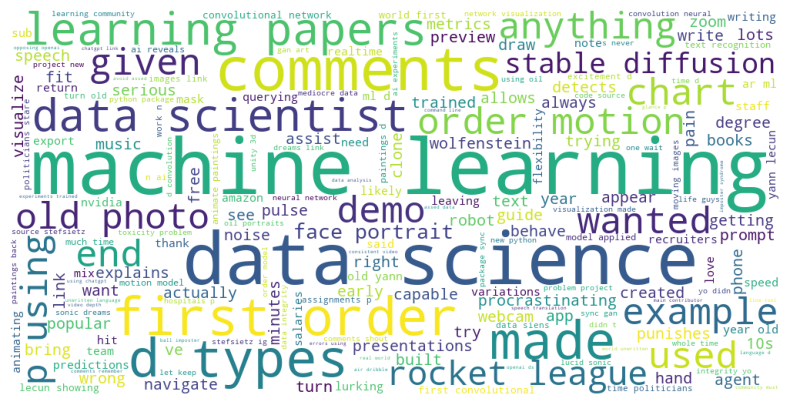

In [17]:
post_title_text = ' '.join([title for title in posts_df['post_title'].str.lower()]
                          )
word_cloud = WordCloud(collocation_threshold=2,
                       width=1000,
                       height=500,
                       background_color='white').generate(post_title_text)

# Display the generated word cloud
plt.figure(figsize=(10,5))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [29]:
!pip install emoji==0.6.0

     ---------------------------------------- 0.0/51.0 kB ? eta -:--:--
     -------- ------------------------------- 10.2/51.0 kB ? eta -:--:--
     ------------------------------ ------- 41.0/51.0 kB 487.6 kB/s eta 0:00:01
     ------------------------------ ------- 41.0/51.0 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 51.0/51.0 kB 289.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49743 sha256=4de3dd27a30671146f5c8469e0af2040cf414c702efb23d2efc83270178cddea
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\0d\bf\a2\536017b4a6232aef0fb92831af35facd6590c0af0f3983f63b
Successfully built emoji


In [35]:
sentiment_classifier = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis", framework="pt")



C:\Users\Admin\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [37]:
sentiment_classifier("I Love you")

[{'label': 'POS', 'score': 0.9918103814125061}]

In [39]:
sentiment_classifier("I hate you")

[{'label': 'NEG', 'score': 0.9806600213050842}]

In [41]:
# Let's define a function to get sentiment
def get_sentiment(text):
    # Get sentiment prediction scores
    try:
        sentiment= sentiment_classifier(text)[0]['label']
    except:
        sentiment= 'Not classified'
    return sentiment


In [95]:
#comments_posts_df
comments_posts_df_sub = comments_posts_df[ comments_posts_df['comment'].str.contains('chatgpt')   ]
comments_posts_df_sub

,post_id,subreddit,created_date,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_year,comment
4183,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,I’m not a programmer so I’m curious. How open ...
4221,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,I was expecting some move like this after sudd...
4228,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,"This will get buried, but no. They shouldn't. ..."
4261,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,I am sorry but crypto is nothing compared to t...
4306,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,Exactly - we can’t be 100% certain of course -...
4438,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,Then you completely missed my point. I’m not i...
4494,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,No I think you just didn’t read this post? I’m...
4525,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,of course it doesnt.. The whole answer seems l...
4540,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,"Honestly, I'd be more inclined to trust someth..."
4697,zhrgln,MachineLearning,2022-12-10 18:02:57,NaN,https://i.redd.it/kq518l9ne25a1.gif,[P] I made a command-line tool that explains y...,Project,2874,112,0.97,2022,"If you add ""be as concise as possible"" it cuts..."


In [97]:
comments_posts_df_sub.shape


(16, 12)

In [99]:
comments_posts_df_sub['sentiment'] = comments_posts_df_sub['comment'].astype(str).apply(lambda x: get_sentiment(x))
comments_posts_df_sub

Token indices sequence length is longer than the specified maximum sequence length for this model (205 > 128). Running this sequence through the model will result in indexing errors
C:\Users\Admin\AppData\Local\Temp\ipykernel_14204\3295694029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_posts_df_sub['sentiment'] = comments_posts_df_sub['comment'].astype(str).apply(lambda x: get_sentiment(x))


,post_id,subreddit,created_date,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_year,comment,sentiment
4183,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,I’m not a programmer so I’m curious. How open ...,NEG
4221,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,I was expecting some move like this after sudd...,POS
4228,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,"This will get buried, but no. They shouldn't. ...",NEG
4261,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,I am sorry but crypto is nothing compared to t...,NEG
4306,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,Exactly - we can’t be 100% certain of course -...,Not classified
4438,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,Then you completely missed my point. I’m not i...,NEG
4494,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,No I think you just didn’t read this post? I’m...,Not classified
4525,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,of course it doesnt.. The whole answer seems l...,NEG
4540,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,"Honestly, I'd be more inclined to trust someth...",NEU
4697,zhrgln,MachineLearning,2022-12-10 18:02:57,NaN,https://i.redd.it/kq518l9ne25a1.gif,[P] I made a command-line tool that explains y...,Project,2874,112,0.97,2022,"If you add ""be as concise as possible"" it cuts...",POS


In [101]:
comments_posts_df_sub['sentiment'].value_counts()

sentiment
NEU               6
NEG               5
Not classified    3
POS               2
Name: count, dtype: int64

In [105]:
comments_posts_df_sub[['comment','sentiment']]

,comment,sentiment
4183,I’m not a programmer so I’m curious. How open ...,NEG
4221,I was expecting some move like this after sudd...,POS
4228,"This will get buried, but no. They shouldn't. ...",NEG
4261,I am sorry but crypto is nothing compared to t...,NEG
4306,Exactly - we can’t be 100% certain of course -...,Not classified
4438,Then you completely missed my point. I’m not i...,NEG
4494,No I think you just didn’t read this post? I’m...,Not classified
4525,of course it doesnt.. The whole answer seems l...,NEG
4540,"Honestly, I'd be more inclined to trust someth...",NEU
4697,"If you add ""be as concise as possible"" it cuts...",POS


In [107]:
comments_posts_df_sub[['comment','sentiment']].to_csv('comments_sentiment.csv')

In [113]:
# Let's install hugging face emotion model 
emotion_classifier = pipeline(
    "text-classification", 
    model="bhadresh-savani/distilbert-base-uncased-emotion", 
    top_k=None,  # Use this instead of return_all_scores=True
    framework="pt"
)


In [115]:
emotion_classifier('Ice cream is delicious')

[[{'label': 'joy', 'score': 0.9985546469688416},
  {'label': 'love', 'score': 0.0006351207266561687},
  {'label': 'sadness', 'score': 0.0002589895448181778},
  {'label': 'surprise', 'score': 0.00022095032909419388},
  {'label': 'anger', 'score': 0.00018885242752730846},
  {'label': 'fear', 'score': 0.00014140915300231427}]]

In [127]:
# Let's define a function to get emotion
def get_emotion(text):
    # Get emotion prediction scores
    pred_scores=emotion_classifier('Ice cream is delicious')
    emotion= max(pred_scores[0],key = lambda x: x['score']) ['label']
    return emotion


In [133]:
comments_posts_df_sub['emotion']= comments_posts_df_sub['comment'].astype(str).apply( lambda x : get_emotion(x) )
comments_posts_df_sub

C:\Users\Admin\AppData\Local\Temp\ipykernel_14204\2468051097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_posts_df_sub['emotion']= comments_posts_df_sub['comment'].astype(str).apply( lambda x : get_emotion(x) )


,post_id,subreddit,created_date,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_year,comment,sentiment,emotion
4183,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,I’m not a programmer so I’m curious. How open ...,NEG,joy
4221,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,I was expecting some move like this after sudd...,POS,joy
4228,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,"This will get buried, but no. They shouldn't. ...",NEG,joy
4261,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,I am sorry but crypto is nothing compared to t...,NEG,joy
4306,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,Exactly - we can’t be 100% certain of course -...,Not classified,joy
4438,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,Then you completely missed my point. I’m not i...,NEG,joy
4494,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,No I think you just didn’t read this post? I’m...,Not classified,joy
4525,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,of course it doesnt.. The whole answer seems l...,NEG,joy
4540,11sboh1,MachineLearning,2023-03-16 04:04:01,OpenAI was founded for the explicit purpose of...,https://www.reddit.com/r/MachineLearning/comme...,[D] Our community must get serious about oppos...,Discussion,3012,450,0.95,2023,"Honestly, I'd be more inclined to trust someth...",NEU,joy
4697,zhrgln,MachineLearning,2022-12-10 18:02:57,NaN,https://i.redd.it/kq518l9ne25a1.gif,[P] I made a command-line tool that explains y...,Project,2874,112,0.97,2022,"If you add ""be as concise as possible"" it cuts...",POS,joy


In [145]:
# combine all posts and comments to save as a text file
comments_posts_df_tmp = comments_posts_df[['post_title','selftext','comment']].astype(str)
agg_comments = comments_posts_df_tmp.groupby(['post_title','selftext'])['comment'].apply('. '.join).reset_index()


In [147]:
agg_comments

,post_title,selftext,comment
0,:),nan,"Machine learning is so 2017. Try ""AI-powered m..."
1,"A demo of Stable Diffusion, a text-to-image mo...",nan,This heavily railroaded demo brought to you by...
2,A little seasonal homage... [P],nan,I assume as bacteria affects the pumpkin it wi...
3,"As a hiring manager - this, this right here",nan,He also has a PhD in mathematics so I'm sure t...
4,Beware of today's data,nan,"[deleted]. Personally, I'm looking forwards to..."
...,...,...,...
93,[R] [P] AnimeGANv2 Face Portrait v2,nan,github: [https://github.com/bryandlee/animegan...
94,[R] [RIFE: 15FPS to 60FPS] Video frame interpo...,nan,Github: [https://github.com/hzwer/arXiv2020-RI...
95,[R][P] Runway Stable Diffusion Inpainting: Era...,nan,That's actually done very well. I kinda feel t...
96,data siens,nan,I was once reading this article that went as: ...


In [149]:
# combine all the things together in a single column
agg_comments['combined_text']=agg_comments.astype(str).agg('. '.join, axis=1)
all_text ='. '.join(agg_comments['combined_text'])

In [157]:
posts_agg_comments = agg_comments.drop('combined_text', axis=1)
posts_agg_comments.to_csv('posts_agg_comments.csv',header=True,index=False)

In [153]:
# Save everything into a txt file with UTF-8 encoding
with open("all_text_data.txt", "w", encoding="utf-8") as f:
    f.write(all_text)


In [163]:
posts_df['num_comments'].sum()

13614

In [165]:
'''llama index, creates 
1. index of text chunks from the context file (input) file we create
2. when user asks a question, it finds the most relevant chunks
3. Answers the question using this most relevant chunk
In short, this method, bypassess the token size limit in prompt/token size limit
This also helps connect our model with many of the external data sources (web pages, google docs, twitter etc.)
'''

'llama index, creates \n1. index of text chunks from the context file (input) file we create\n2. when user asks a question, it finds the most relevant chunks\n3. Answers the question using this most relevant chunk\nIn short, this method, bypassess the token size limit in prompt/token size limit\nThis also helps connect our model with many of the external data sources (web pages, google docs, twitter etc.)\n'

In [135]:
!pip install llama_index

  Using cached pydantic-2.9.2-py3-none-any.whl.metadata (149 kB)
  Using cached pydantic_core-2.23.4-cp312-none-win_amd64.whl.metadata (6.7 kB)
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------- ----------------------------- 0.4/1.6 MB 8.9 MB/s eta 0:00:01
   ---------------------------------------  1.6/1.6 MB 20.0 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 16.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ----------------------------------- ---- 1.1/1.2 MB 33.3 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 25.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------------------------------- -- 1.4/1.5 MB 29.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 24.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/173.8 kB ? eta -:--:--
   -------------------------------------

In [167]:
'''
Langchain is another package (framework) that will help us interface with the LLM
'''

'\nLangchain is another package (framework) that will help us interface with the LLM\n'

In [137]:
!pip install langchain

  Using cached langchain_text_splitters-0.3.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached orjson-3.10.7-cp312-none-win_amd64.whl.metadata (51 kB)
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.0 MB 653.6 kB/s eta 0:00:02
   -------------- ------------------------- 0.4/1.0 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------  1.0/1.0 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------  1.0/1.0 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/400.9 kB ? eta -:--:--
   --------------------------------------- 400.9/400.9 kB 12.2 MB/s eta 0:00:00
Using cached langchain_text_splitters-0.3.0-py3-none-any.whl (25 kB)
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 294.6/294.6 kB 9.2 MB/s eta 0:00:00
Using cached orjson-3.10.7

In [169]:
# import modules from llama index and langchain
from llama_index import SimpleDirectoryReader, GPTSimpleVectorIndex, LLMPredictor, PromptHelper
from langchain import OpenAI
import os
from IPython.display import Markdown, Display 

ImportError: cannot import name 'SimpleDirectoryReader' from 'llama_index' (unknown location)

In [ ]:
# Create a function to create a index from text file


In [171]:
pip show llama-index


Name: llama-indexNote: you may need to restart the kernel to use updated packages.

Version: 0.11.16
Summary: Interface between LLMs and your data
Home-page: https://llamaindex.ai
Author: Jerry Liu
Author-email: jerry@llamaindex.ai
License: MIT
Location: C:\Users\Admin\anaconda3\Lib\site-packages
Requires: llama-index-agent-openai, llama-index-cli, llama-index-core, llama-index-embeddings-openai, llama-index-indices-managed-llama-cloud, llama-index-legacy, llama-index-llms-openai, llama-index-multi-modal-llms-openai, llama-index-program-openai, llama-index-question-gen-openai, llama-index-readers-file, llama-index-readers-llama-parse, nltk
Required-by: 


In [173]:
pip install --upgrade llama-index



  Using cached tenacity-8.5.0-py3-none-any.whl.metadata (1.2 kB)
Using cached tenacity-8.5.0-py3-none-any.whl (28 kB)
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [175]:
import llama_index
print(dir(llama_index))


['__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__']


In [177]:
from llama_index.readers import SimpleDirectoryReader

ImportError: cannot import name 'SimpleDirectoryReader' from 'llama_index.readers' (unknown location)